# PyTorch hardware benchmark analysis

Single node throughput comparisons between different hardware options at NERSC.

In [2]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [5]:
results_files = glob.glob('/global/cscratch1/sd/sfarrell/pytorch-benchmarks/*-v1.2.0*-n1/results.txt')

results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n1/results.txt']

In [6]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True)

results

,train_rate,inference_rate,ranks,hardware,version,model
0,13.557418,47.904272,1,hsw,v1.2.0,inceptionV3
1,367.209851,813.716555,1,hsw,v1.2.0,lstm
2,203.419221,714.774127,1,hsw,v1.2.0,alexnet
3,14.629206,50.253714,1,hsw,v1.2.0,resnet50
4,20.162038,62.550474,1,hsw,v1.2.0,vgg11
5,188.397610,392.136458,1,hsw,v1.2.0,cnn3d


## Tables

In [7]:
# Training rate per hardware
results.groupby('model').apply(lambda g: pd.Series(data=g.train_rate.values, index=g.hardware))

hardware,hsw
model,
alexnet,203.419221
cnn3d,188.397610
inceptionV3,13.557418
lstm,367.209851
resnet50,14.629206
vgg11,20.162038


In [9]:
# Evaluation rate per hardware
results.groupby('model').apply(lambda g: pd.Series(data=g.inference_rate.values, index=g.hardware))

hardware,hsw
model,
alexnet,714.774127
cnn3d,392.136458
inceptionV3,47.904272
lstm,813.716555
resnet50,50.253714
vgg11,62.550474


## Training throughput comparisons

In [10]:
models = ['alexnet', 'vgg11', 'inceptionV3', 'resnet50', 'cnn3d', 'lstm']
results_by_model = results.groupby('model')

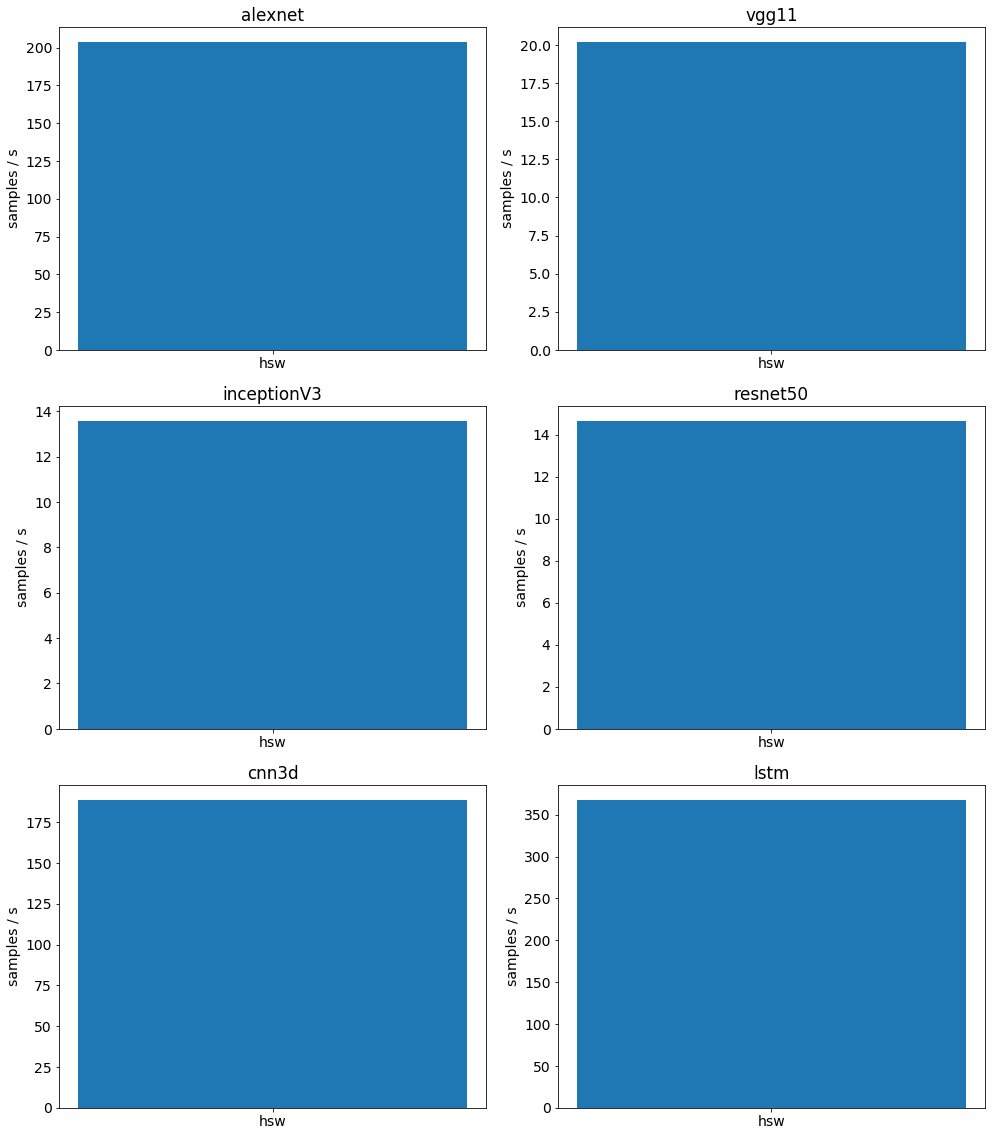

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results_by_model.get_group(model)
    ax.bar(model_results.hardware, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()